# Задача 1

In [2717]:
from IPython.display import Image
#Image(url="1.png")

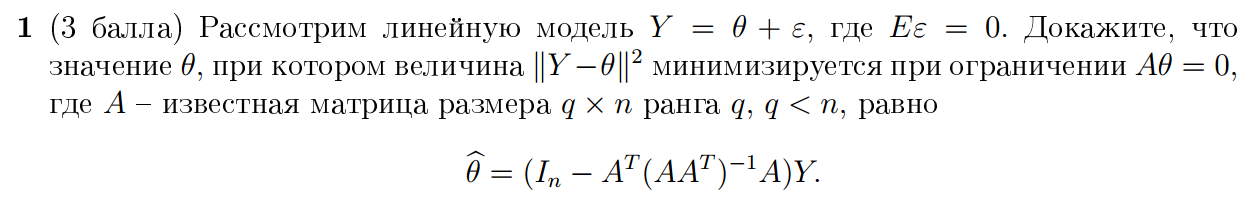

$\newcommand{\norm}[1]{\left\lVert#1\right\rVert}$
$\newcommand{\lr}[1]{\left(#1\right)}$

Решается задача
$$\min_{s.t.\ A\theta = 0}\norm{Y - \theta}^2$$

То есть ищется проекция $Pr_{A^\bot}Y$

Не стану переписывать доказательство [Формулы (p.430)](https://personal.utdallas.edu/~jwz120030/Teaching/M4355/Books/MeyerMatrixAnalysis.pdf)

Матрица $A^\mathsf{T}$ задаёт подпространство $\mathbb{R}^n$ с базисом из $q$ векторов
$$Pr_{A^\mathsf{T}}Y = A^\mathsf{T}\lr{AA^\mathsf{T}}^{-1}A$$
$$Pr_{A^\mathsf{T}} = I - Pr_{A^\bot}$$
Итого, $$\hat{\theta} = Pr_{A^\bot}Y = \lr{I - A^\mathsf{T}\lr{AA^\mathsf{T}}^{-1}A}Y$$

In [2718]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import LeaveOneOut
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
sns.set(style="darkgrid", font_scale=1.4)
plt.style.use("dark_background")

# Задача 2

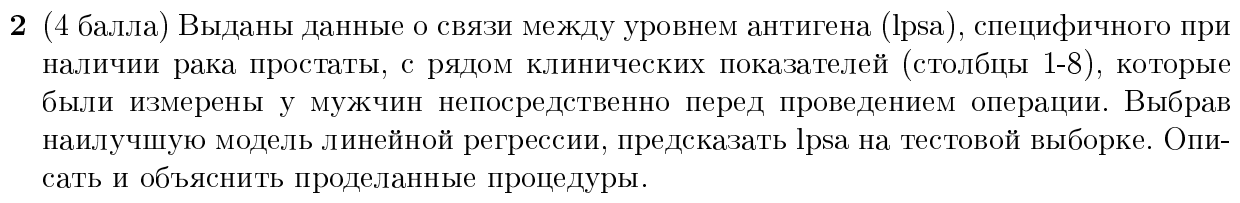

In [2719]:
df = pd.DataFrame(pd.read_csv("msps2018-hw9-2/Prostate_train.csv"))
train = df.dropna(how='any').reset_index().drop(columns=['index'])
train

,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564
...,...,...,...,...,...,...,...,...,...,...
63,91,3.246491,4.101817,68,-1.386294,0,-1.386294,6,0,4.029806
64,92,2.532903,3.677566,61,1.348073,1,-1.386294,7,15,4.129551
65,93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
66,94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443


In [2720]:
X = train.drop(columns=['lpsa', 'id']) # data
y = train['lpsa']                      # target

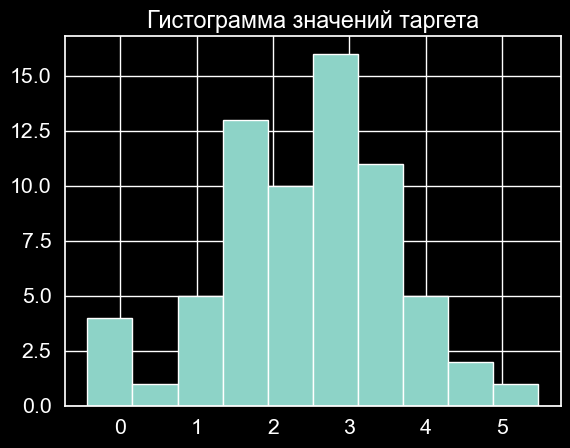

In [2721]:
y.hist()
plt.title("Гистограмма значений таргета");

Гистограммы значений фичей

array([[<Axes: title={'center': 'lcavol'}>,
        <Axes: title={'center': 'lweight'}>,
        <Axes: title={'center': 'age'}>],
       [<Axes: title={'center': 'lbph'}>,
        <Axes: title={'center': 'svi'}>, <Axes: title={'center': 'lcp'}>],
       [<Axes: title={'center': 'gleason'}>,
        <Axes: title={'center': 'pgg45'}>, <Axes: >]], dtype=object)

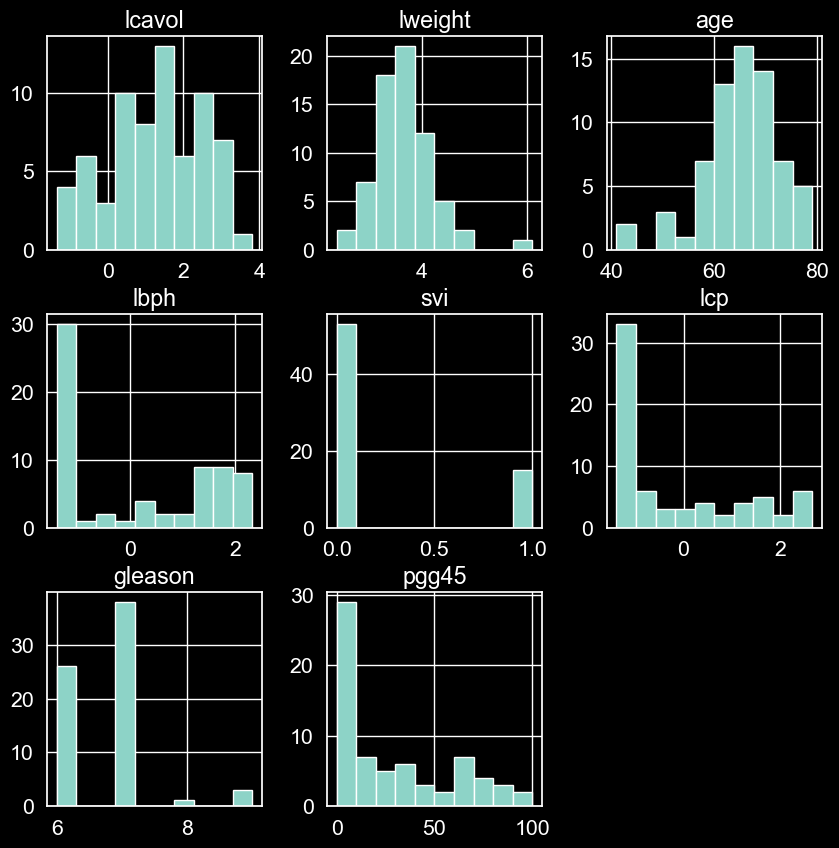

In [2722]:
X.hist(figsize=(10, 10))

Нормируем данные

In [2723]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

Строим регрессию

In [2724]:
cls = LinearRegression().fit(X, y);

Коэффициенты(веса)

In [2725]:
cls.coef_

array([ 0.743012  ,  0.23047827, -0.12510311,  0.23210819,  0.31266231,
       -0.28606074, -0.02918509,  0.27717145])

Сдвиг

In [2726]:
cls.intercept_

2.4458137455882354

Коэффициент детерминации

In [2727]:
cls.score(X, y)

0.6822017443997476

Коэффициент детерминации $R^2 = 0.68$ не высокий, но тем более не околонулевой. 

Исследуем получившуюся модель:

### 1. Анализ остатков:

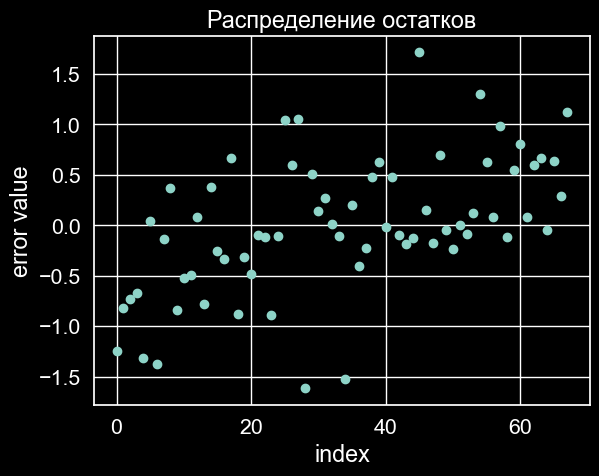

In [2728]:
plt.plot(y - cls.predict(X), 'o')
plt.title("Распределение остатков")
plt.ylabel('error value')
plt.xlabel('index');

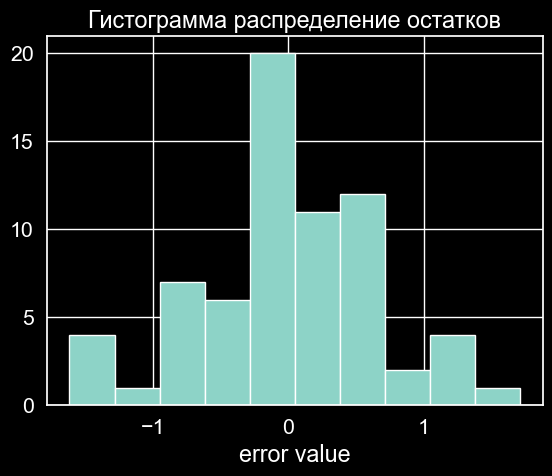

In [2729]:
plt.hist(y - cls.predict(X), bins=10)
plt.title("Гистограмма распределение остатков")
plt.xlabel('error value');

Стьюдентизированные остатки

$$X \in \mathbb{R}^{n \times k}, \quad y \in \mathbb{R} \\ RSS = \sum_{i=1}^n(y_i - \hat{y_i})^2 \\ \hat{\sigma}^2 = \frac{RSS}{n-k-1} \\ H = (X^\mathsf{T}X)^{-1}X^\mathsf{T} \\ d_i = \frac{y_i - \hat{y_i}}{\sqrt{\frac{RSS}{n-k}}\sqrt{1 - h_{ii}}}$$

In [2730]:
n = X.shape[0]
k = X.shape[1]

In [2731]:
H = X.dot(np.linalg.inv(X.T.dot(X))).dot(X.T)
RSS = ((y - cls.predict(X)) ** 2).sum()
std = RSS / (n - k - 1)
d = (y - cls.predict(X)) / np.sqrt(std) / np.sqrt(1 - np.diag(H))

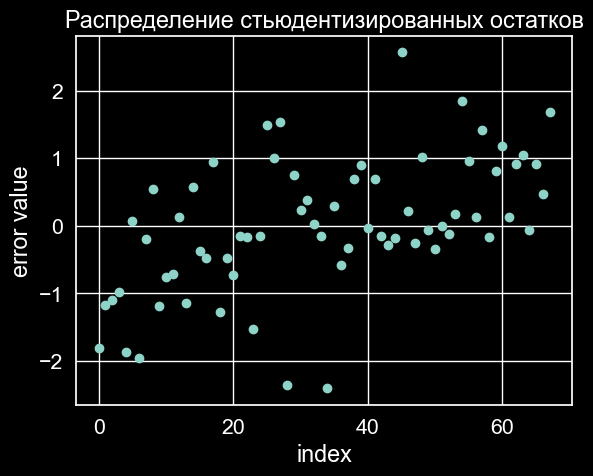

In [2732]:
plt.plot(d, 'o')
plt.title("Распределение стьюдентизированных остатков")
plt.ylabel('error value')
plt.xlabel('index');

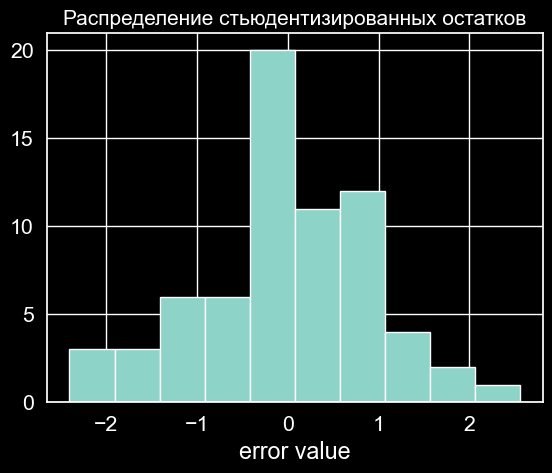

In [2733]:
plt.hist(d, bins=10)
plt.title("Распределение стьюдентизированных остатков", fontsize=15)
plt.xlabel('error value');

In [2734]:
sps.normaltest(d)

NormaltestResult(statistic=0.8628396727978582, pvalue=0.6495861336147349)

pvalue велико (0.65), так что гипотезу о нормальности ошибок не отвергаем. 

В самом деле, распределение ошибок похоже на нормальное, что видно из следующих графиков:

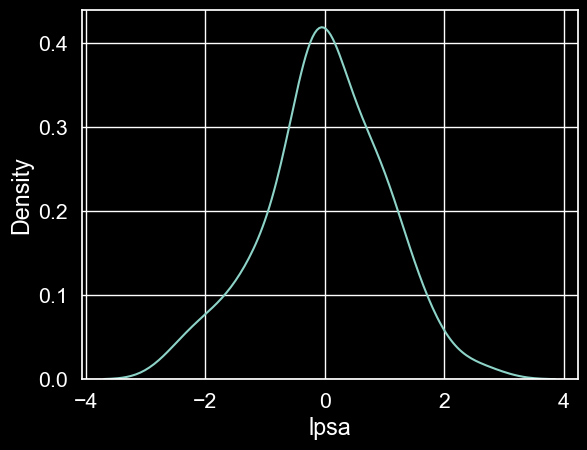

In [2735]:
sns.kdeplot(d);

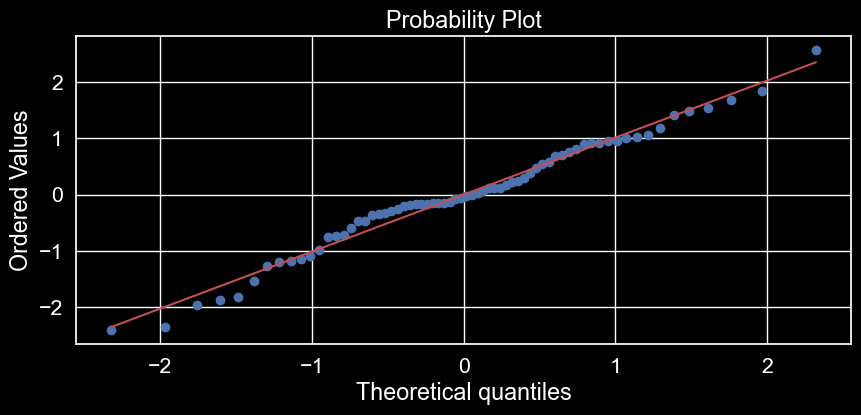

In [2736]:
import pylab 
plt.figure(figsize=(10, 4))
sps.probplot(d, dist="norm", plot=pylab);

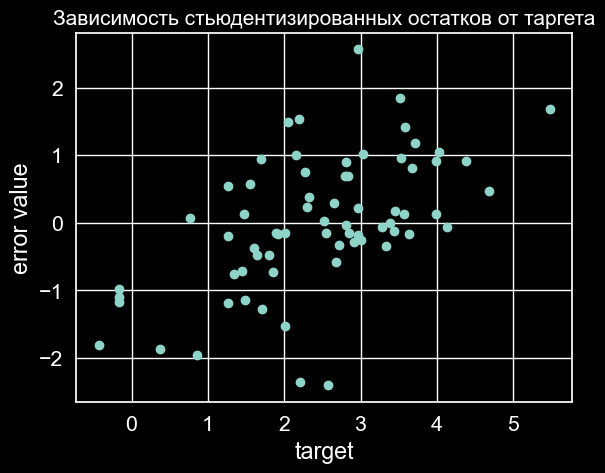

In [2737]:
plt.plot(y, d, 'o')
plt.title("Зависимость стьюдентизированных остатков от таргета", fontsize=15)
plt.ylabel('error value')
plt.xlabel('target');

С ростом таргета, ошибка смещается в положительную сторону.

Значит, наша модель скорее всего не полна

Посмотрим на зависимость ошибки от каждой из фичей

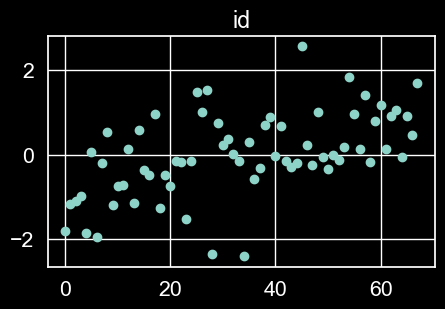

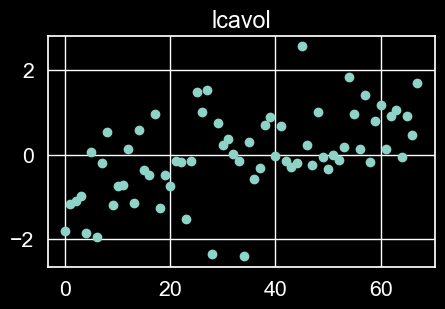

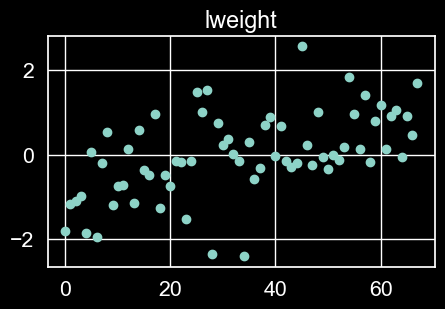

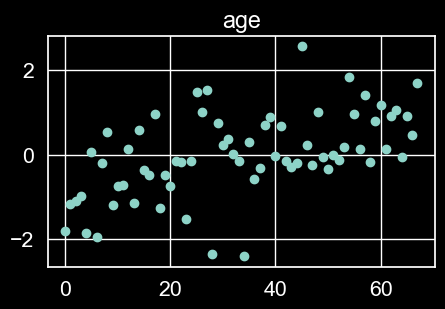

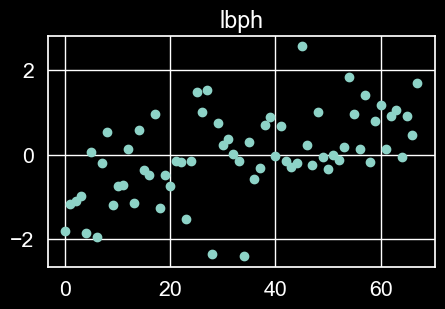

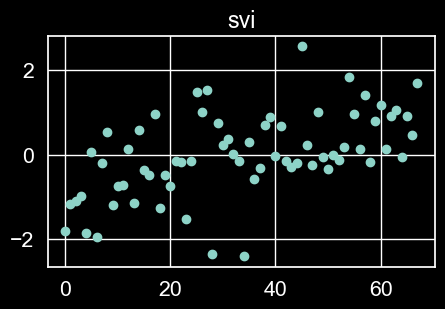

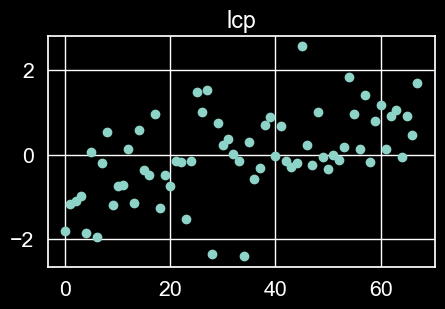

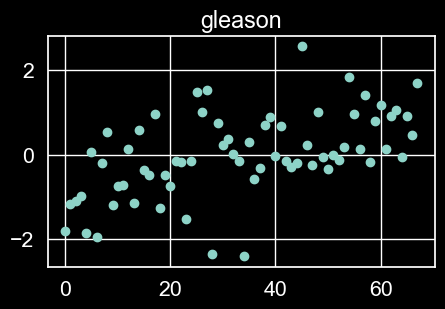

In [2738]:
for i in range(k):
    plt.figure(figsize=(5, 3))
    plt.plot(d[X[:, i].argsort()], 'o')
    plt.title(train.columns[i])

### 2. Попробуем преобразовать фичи

Судя по тому, что ошибка начинала смещаться в плюс с ростом нашего таргета, возможно, есть какие-то нелинейные зависимости таргета от имеющихся фичей.
Это можно проверить с помощью критерия RESET Рэмси https://en.wikipedia.org/wiki/Ramsey_RESET_test. 

Проверим, есть ли степенная зависимость:

In [2739]:
z = cls.predict(X).reshape((-1, 1))
X_reset = np.hstack([X, z ** 2, z ** 3, z ** 4, z ** 5])  # reshape((-1, 1)) the unspecified value is inferred to be n
cls_reset = LinearRegression().fit(X_reset, y)
y_reset = cls_reset.predict(X_reset)

In [2740]:
RSS_new = ((y - y_reset) ** 2).sum()
RSS_new

24.29898454998839

In [2741]:
RSS

30.659839888731238

In [2742]:
F = (RSS - RSS_new) / std

In [2743]:
sps.f.sf(F, 1, n - k - 1)

0.0008962479157131853

F - статистика менее 5%, отвергаем гипотезу, что коэффициенты при степенях таргета одновременно нули

Нормализуем фичи

In [2744]:
X_normalized = sklearn.preprocessing.normalize(X)
cls_normalized = LinearRegression().fit(X_normalized, y)
cls_normalized.score(X_normalized, y)

0.6723503163079779

Применим преобразование Бокса-Кокса

In [2745]:
X_boxcox = np.array([
    sps.boxcox((X - X.min(axis=0) + 0.001)[:, i])[0] for i in range(k)
]).T
cls_boxcox = LinearRegression().fit(X_boxcox, y)
cls_boxcox.score(X_boxcox, y)

0.6838390467675739

А теперь вместе - Бокс-Кокс для нормализованных

In [2746]:
X_norm_boxcox = np.array([
    sps.boxcox((X_normalized - X_normalized.min(axis=0) + 0.001)[:, i])[0] for i in range(k)
]).T
cls_norm_boxcox = LinearRegression().fit(X_norm_boxcox, y)
cls_norm_boxcox.score(X_norm_boxcox, y)

0.6572466576104838

Исходный же коэффициент детерминации $R^2$

In [2747]:
cls.score(X, y)

0.6822017443997476

Итого, преобразование Бокса-Кокса даёт небольшой прирост $R^2$, а нормализация его только уменьшает

Применим ортогонализацию Грама-Шмидта:

In [2748]:
X_gram_schmidt = np.linalg.qr(X)[0]
cls_gram_schmidt = LinearRegression().fit(X_gram_schmidt, y)
cls_gram_schmidt.score(X_gram_schmidt, y)

0.6822017443997476

In [2749]:
cls_gram_schmidt.score(X_gram_schmidt, y) - cls.score(X, y)

0.0

Значит, фичи и так ортогональны

### 3. Попробуем исключить некоторые признаки

In [2750]:
import statsmodels
import statsmodels.stats
import statsmodels.stats.outliers_influence

Variance inflation factor

In [2751]:
from statsmodels.tools import add_constant

[
    [statsmodels.stats.outliers_influence.variance_inflation_factor(add_constant(X), i), train.columns[i]]
    for i in range(9)
][:-1]

[[1.0, 'id'],
 [2.2876273648863754, 'lcavol'],
 [1.3861676919788697, 'lweight'],
 [1.3436611367638984, 'age'],
 [1.3841138884621147, 'lbph'],
 [2.0513006151522566, 'svi'],
 [3.15003562637265, 'lcp'],
 [2.6825956356297866, 'gleason']]

Фичей с VIF > 5 (рекомендованный порог) нет. Удалим же фичу с максимальным VIF, то есть gleason

In [2752]:
X_no_gleason = X[:, [0, 1, 2, 3, 4, 5, 7]]
cls_no_temp = LinearRegression().fit(X_no_gleason, y)
score_no_gleason = cls_no_temp.score(X_no_gleason, y)
score_no_gleason

0.6819779457713355

Теперь $R^2$ только упал

In [2753]:
X_no_pgg = X[:, :-1]
cls_no_temp = LinearRegression().fit(X_no_pgg, y)
score_no_pgg = cls_no_temp.score(X_no_pgg, y)
score_no_pgg

0.6660512285868101

pgg45 тоже убирать не следует

In [2754]:
def llo(X, y):
    return sum([(y[test] - LinearRegression().fit(X[train], y[train]).predict(X[test]))**2 for train, test in LeaveOneOut().split(X)])

In [2755]:
print('original', llo(X, y))
print('normalized', llo(X_normalized, y))
print('boxcox', llo(X_boxcox, y))

original 41.22978514917093
normalized 40.8869004832295
boxcox 40.304278858433946


Ничего нового, boxcox лучше прочего

### 4. Не степенные преобразования таргета с таргетом

In [2756]:
new_y = np.log(y+1)**2
cls_square = LinearRegression().fit(X, new_y)
cls_square.score(X, new_y)

0.6772210477459393

In [2757]:
new_y = abs(y)**(1./3)
cls_square = LinearRegression().fit(X, new_y)
cls_square.score(X, new_y)

0.6392253335680624

Как и взятие корня)

### 5. Посмотрим на модель c применённым Бокс-Кокс и добавленным признаком времени

In [2758]:
X_time = np.c_[X_boxcox, np.arange(n)]
cls_time = sklearn.linear_model.LinearRegression().fit(X_time, y)
score_time = cls_time.score(X_time, y)
score_time

0.9475288053804853

А вот такой коэффициент детерменации уже заметно выше

In [2759]:
print(1 - (1 - score_time) * (n - 1) / (n - k - 1 + 1))

0.9414071660082086


Стьюдентизированные остатки модели с признаком времени

In [2760]:
X_ = X_time
cls = cls_time
H = X_.dot(np.linalg.inv(X_.T.dot(X_))).dot(X_.T)
RSS = ((y - cls.predict(X_)) ** 2).sum()
std = RSS / (n - k - 1)
e = (y - cls.predict(X_)) / np.sqrt(std) / np.sqrt(1 - np.diag(H))

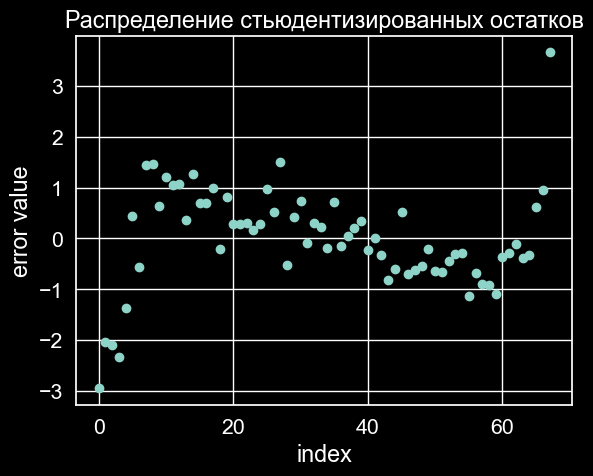

In [2761]:
plt.plot(e, 'o')
plt.title("Распределение стьюдентизированных остатков")
plt.ylabel('error value')
plt.xlabel('index');

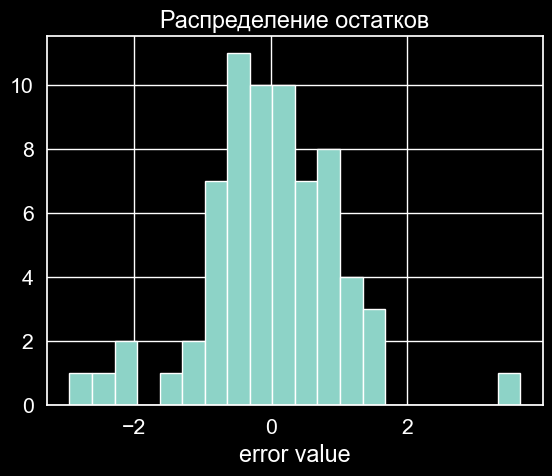

In [2762]:
plt.hist(e, bins=20)
plt.title("Распределение остатков")
plt.xlabel('error value');

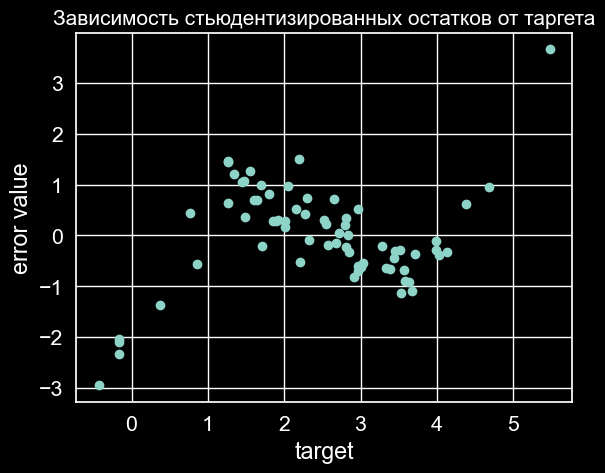

In [2763]:
plt.plot(y, e, 'o')
plt.title("Зависимость стьюдентизированных остатков от таргета", fontsize=15)
plt.ylabel('error value')
plt.xlabel('target');

Видна кубическая зависимость. Вновь обратимся к RESET Рэмси

In [2764]:
z = cls.predict(X_).reshape((-1, 1))
Z = [z**i for i in range(2, 15)]  # оптимально до 15 степени, проверено кровью и потом
X_reset = np.hstack([X_, np.hstack(Z)])  # reshape((-1, 1)) the unspecified value is inferred to be n
cls_reset = LinearRegression().fit(X_reset, y)
y_reset = cls_reset.predict(X_reset)
RSS_new = ((y - y_reset) ** 2).sum()
F = (RSS - RSS_new) / std

In [2765]:
sps.f.sf(F, 1, n - k - 1)

7.07502762660103e-10

Таким образом, найдена релевантная модель линейной регрессии

$$y = \beta x + \gamma \hat{y}^2 + \delta \hat{y}^3$$

Увеличение степеней мономов не даёт значимого улучшения 

In [2766]:
cls_reset.coef_

array([-1.08373161e+02, -3.69441676e+01,  2.14626288e+01, -1.83789013e+01,
        3.01472599e-01, -2.10148464e+00,  3.29855241e+01, -3.18055634e+01,
       -4.28754582e+01,  3.52447384e+03, -8.96676460e+03,  1.50151815e+04,
       -1.75712456e+04,  1.48431289e+04, -9.20414681e+03,  4.21416366e+03,
       -1.41929690e+03,  3.46569236e+02, -5.95840015e+01,  6.82889325e+00,
       -4.67773827e-01,  1.44724230e-02])

In [2767]:
cls_reset.intercept_

-398.98705880311115

In [2768]:
CLS = cls_reset

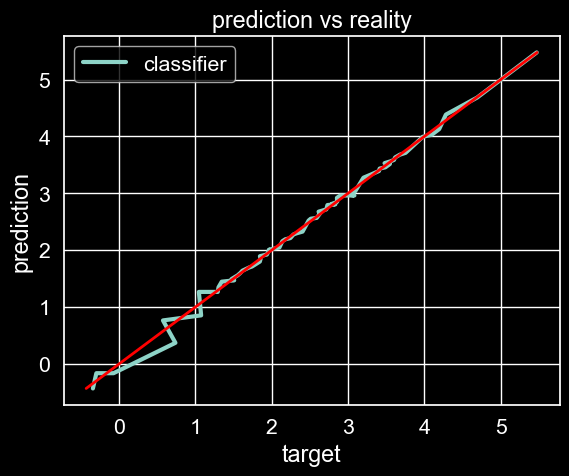

In [2769]:
plt.plot(CLS.predict(X_reset), train['lpsa'], linewidth=3, label='classifier')
plt.plot(train['lpsa'], train['lpsa'], linewidth=2, color='red')
plt.xlabel('target')
plt.ylabel('prediction')
plt.title('prediction vs reality')
plt.legend();

In [2770]:
CLS.score(X_reset, y)

0.995492703070189

### 6. Напоследок - попробуем регуляризировать нашу модель. Для этого воспользуемся Ridge, Lasso и их комбинацией ElasticNet

In [2771]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
import warnings
warnings.filterwarnings('ignore')

In [2772]:
cls_ridge = Ridge(alpha=0.1).fit(X_reset, y)
score_ridge = cls_ridge.score(X_reset, y)
score_ridge

0.9931894515930126

In [2773]:
cls_lasso = Lasso(alpha=0.1).fit(X_reset, y)
score_lasso = cls_lasso.score(X_reset, y)
score_lasso

0.9689403677524232

In [2774]:
cls_elastic = ElasticNet(alpha=0.1).fit(X_reset, y)
score_elastic = cls_elastic.score(X_reset, y)
score_elastic

0.9713168958780153

Зависимость весов факторов от степени регуляризации:

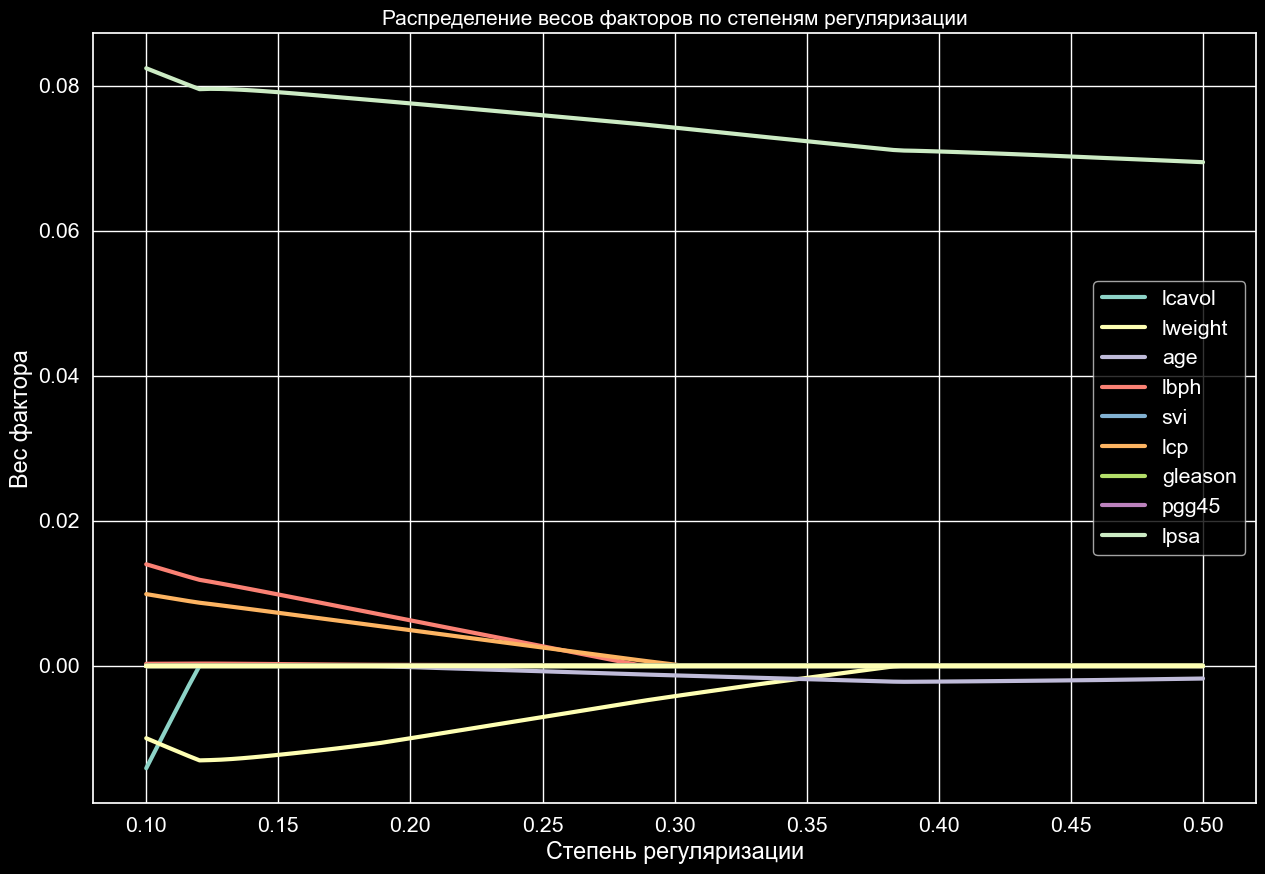

In [2775]:
plt.figure(figsize=(15, 10))
x = np.linspace(0.1, 0.5, 100)
plt.plot(x, [ElasticNet(alpha=i).fit(X_reset, y).coef_ for i in x], lw=3)
plt.legend(train.columns[1:], loc='best')
plt.title("Распределение весов факторов по степеням регуляризации", fontsize=15)
plt.ylabel("Вес фактора")
plt.xlabel("Степень регуляризации");

Видим, что регурялизация не имеет смысла

## Наконец, предскажем таргет на тестовой выборке

In [2776]:
test = df[df['lpsa'].isna() == True].reset_index().drop(columns=['index'])
test

,id,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,7,0.737164,3.473518,64,0.615186,0,-1.386294,6,0,NaN
1,9,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0,NaN
2,10,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0,NaN
3,15,1.205971,3.442019,57,-1.386294,0,-0.430783,7,5,NaN
4,22,2.059239,3.501043,60,1.474763,0,1.348073,7,20,NaN
5,25,0.385262,3.667400,69,1.599388,0,-1.386294,6,0,NaN
6,26,1.446919,3.124565,68,0.300105,0,-1.386294,6,0,NaN
7,28,-0.400478,3.865979,67,1.816452,0,-1.386294,7,20,NaN
8,34,0.009950,3.267666,54,-1.386294,0,-1.386294,6,0,NaN
9,36,1.308333,4.119850,64,2.171337,0,-1.386294,7,5,NaN


In [2777]:
X_test = test.drop(columns=['lpsa', 'id']) # test data
X_test

,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
0,0.737164,3.473518,64,0.615186,0,-1.386294,6,0
1,-0.776529,3.539509,47,-1.386294,0,-1.386294,6,0
2,0.223144,3.244544,63,-1.386294,0,-1.386294,6,0
3,1.205971,3.442019,57,-1.386294,0,-0.430783,7,5
4,2.059239,3.501043,60,1.474763,0,1.348073,7,20
5,0.385262,3.667400,69,1.599388,0,-1.386294,6,0
6,1.446919,3.124565,68,0.300105,0,-1.386294,6,0
7,-0.400478,3.865979,67,1.816452,0,-1.386294,7,20
8,0.009950,3.267666,54,-1.386294,0,-1.386294,6,0
9,1.308333,4.119850,64,2.171337,0,-1.386294,7,5


In [2778]:
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)
n = X_test.shape[0]
k = X_test.shape[1]

In [2779]:
X_test_boxcox = np.array([
    sps.boxcox((X_test - X_test.min(axis=0) + 0.001)[:, i])[0] for i in range(k)
]).T

In [2780]:
X_test = np.c_[X_test_boxcox, np.arange(n)]
z = cls.predict(X_test).reshape((-1, 1))
Z = [z**i for i in range(2, 15)]  # оптимально до 15 степени, проверено кровью и потом
X_test_reset = np.hstack([X_test, np.hstack(Z)])  # reshape((-1, 1)) the unspecified value is inferred to be n

In [2781]:
y_test = CLS.predict(X_test_reset)
y_test = pd.DataFrame(y_test).rename(columns={0: 'lpsa'})
y_test = pd.DataFrame(np.stack((test['id'], y_test['lpsa']), axis=1)).rename(columns={0: 'id', 1: 'lpsa'})
y_test['id'] = y_test['id'].astype(int)
y_test

,id,lpsa
0,7,0.300897
1,9,-0.266909
2,10,0.004788
3,15,0.710953
4,22,1.030644
5,25,0.982740
6,26,1.051649
7,28,1.179014
8,34,1.121989
9,36,1.321037


In [2782]:
y_train = train[['id', 'lpsa']]
y_train

,id,lpsa
0,1,-0.430783
1,2,-0.162519
2,3,-0.162519
3,4,-0.162519
4,5,0.371564
...,...,...
63,91,4.029806
64,92,4.129551
65,93,4.385147
66,94,4.684443


In [2783]:
ans = pd.DataFrame(np.vstack((y_test, y_train))).rename(columns={0: 'id', 1: 'lpsa'}).sort_values(by='id')
ans = ans.reset_index().drop(columns='index')
ans['id'] = ans['id'].astype(int)
ans

,id,lpsa
0,1,-0.430783
1,2,-0.162519
2,3,-0.162519
3,4,-0.162519
4,5,0.371564
...,...,...
92,93,4.385147
93,94,4.684443
94,95,2.149516
95,96,5.477509


In [2784]:
ans.to_csv('msps2018-hw9-2/Prostate_sample.csv', index=False) 

# Задача 3

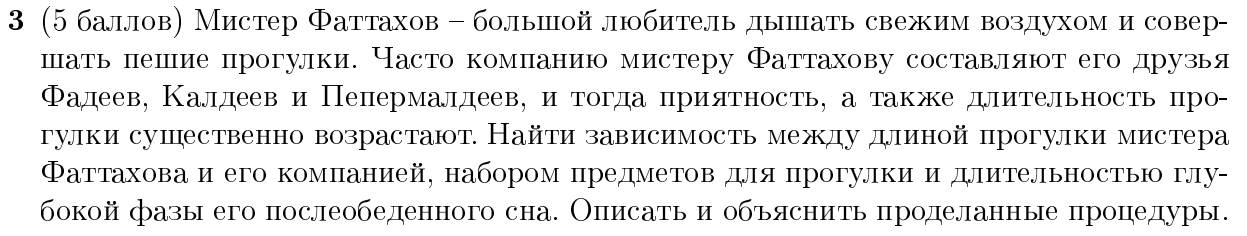

In [2819]:
df = pd.DataFrame(pd.read_csv("msps2018-hw9-3/hw9t3_train.csv"))
train = df.dropna(how='any').reset_index().drop(columns=['index'])
train

,id,Fadeev,Khaldeev,Pepermaldeev,kees,top hat,turtle,gloves,small cart,cardboard,...,elefant,zeta function,Alla Pugachyova,soldering iron,frypan,drums,yellow submarine,sleep,mood,duration
0,0,1,1,1,0,0,0,1,1,1,...,0,1,1,0,0,0,1,3.418333,frivolous,11.851099
1,2,0,0,1,1,1,1,1,1,0,...,0,0,0,0,0,1,1,3.229007,so-so,3.751619
2,3,1,1,1,1,1,1,1,1,1,...,1,0,0,1,1,1,0,2.513620,emotional,9.366979
3,7,0,0,0,0,0,0,0,0,1,...,0,1,1,0,1,0,0,3.039107,frivolous,3.130255
4,10,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,0,3.770051,apathic,1.545275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,495,0,0,1,1,0,1,1,0,0,...,0,1,0,1,0,1,1,3.246401,apathic,7.854242
374,496,0,1,1,0,1,0,1,0,0,...,1,1,0,0,0,1,1,3.679052,frivolous,6.641359
375,497,1,0,1,1,0,1,0,0,1,...,1,1,0,0,1,1,1,2.970870,frivolous,7.629977
376,498,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,3.111193,good,1.152128


In [2820]:
train.columns

Index(['id', 'Fadeev', 'Khaldeev', 'Pepermaldeev', 'kees', 'top hat', 'turtle',
       'gloves', 'small cart', 'cardboard', 'brush', 'toothpaste', 'watch',
       'table', 'flute', 'tallboy', 'drill', 'monkey', 'apple', 'irunine',
       'gel', 'rocket', 'rabbit', 'grand piano', 'whistle', 'Coca-cola',
       'Stanley cup', 'desk', 'elefant', 'zeta function', 'Alla Pugachyova',
       'soldering iron', 'frypan', 'drums', 'yellow submarine', 'sleep',
       'mood', 'duration'],
      dtype='object')

In [2821]:
train['mood'].unique()

array(['frivolous', 'so-so', 'emotional', 'apathic', 'good', 'moody',
       'bad', 'excellent'], dtype=object)

In [2822]:
train = train.drop(columns=['mood']).join(pd.get_dummies(train['mood']))
train = train.drop(columns=['yellow submarine']).join(pd.get_dummies(train['yellow submarine']))
train = train.drop(columns=['duration']).join(train['duration'])
train = train.astype(float)
train

,id,Fadeev,Khaldeev,Pepermaldeev,kees,top hat,turtle,gloves,small cart,cardboard,...,bad,emotional,excellent,frivolous,good,moody,so-so,0,1,duration
0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,11.851099
1,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,3.751619
2,3.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.366979
3,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,3.130255
4,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.545275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,495.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,7.854242
374,496.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,6.641359
375,497.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,7.629977
376,498.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.152128


In [2823]:
X = train.drop(columns=['duration', 'id']) # data
y = train['duration']                      # target

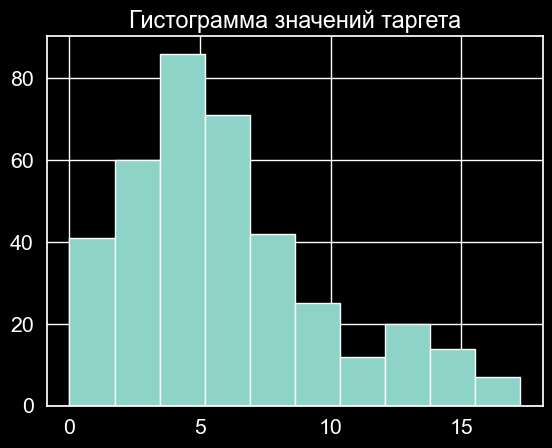

In [2824]:
y.hist()
plt.title("Гистограмма значений таргета");

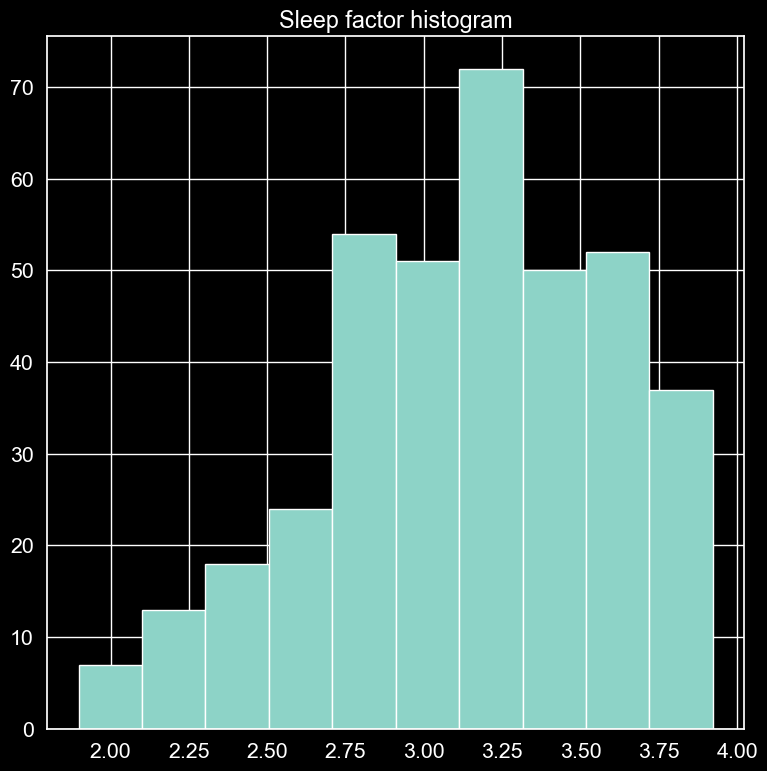

In [2825]:
X['sleep'].hist(figsize=(9, 9))
plt.title('Sleep factor histogram');

Нормируем данные

In [2826]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

TypeError: Feature names are only supported if all input features have string names, but your input has ['int', 'str'] as feature name / column name types. If you want feature names to be stored and validated, you must convert them all to strings, by using X.columns = X.columns.astype(str) for example. Otherwise you can remove feature / column names from your input data, or convert them all to a non-string data type.

In [2827]:
X

,Fadeev,Khaldeev,Pepermaldeev,kees,top hat,turtle,gloves,small cart,cardboard,brush,...,apathic,bad,emotional,excellent,frivolous,good,moody,so-so,0,1
0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
374,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
375,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
376,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


Строим регрессию

# Задача 4

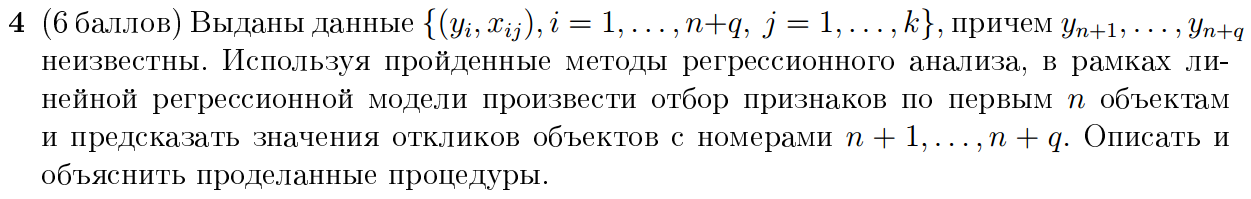

In [2828]:
df = pd.DataFrame(pd.read_csv("msps2018-hw9-4/parkinsons_updrs_train.csv"))
train = df.dropna(how='any').reset_index().drop(columns=['index'])
train

FileNotFoundError: [Errno 2] No such file or directory: 'msps2018-hw9-4/parkinsons_updrs_train.csv'

# Задача 5

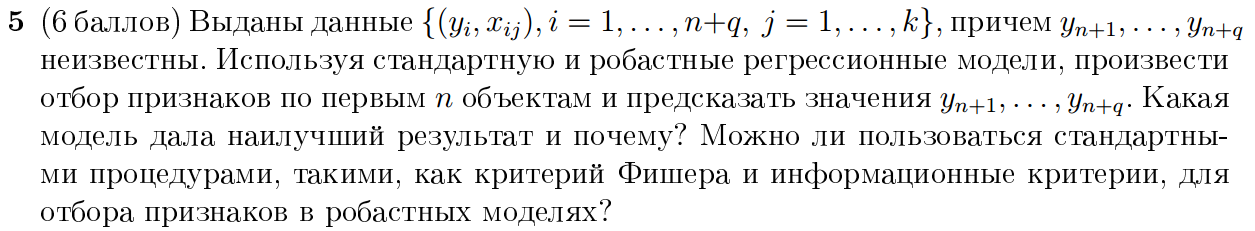